In [2]:
from matplotlib import pyplot as plt
import numpy as np
import itertools
import torch
import cv2
import os 
%matplotlib inline

### Check data length 

In [6]:
list_dir = ['data/train/images','data/test/images','data/valid/images']
print('Number of samples  : \n')
for i in list_dir:
    lst = os.listdir(i) 
    number_files = len(lst)
    print(i.split('/')[1],':',number_files)

Number of samples  : 

train : 2470
test : 118
valid : 235


### Load model

In [30]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='TRAIEND_WEIGHTS_PATH', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\g513/.cache\torch\hub\master.zip
YOLOv5  2022-11-24 Python-3.8.10 torch-1.13.0+cu116 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


### Testing model

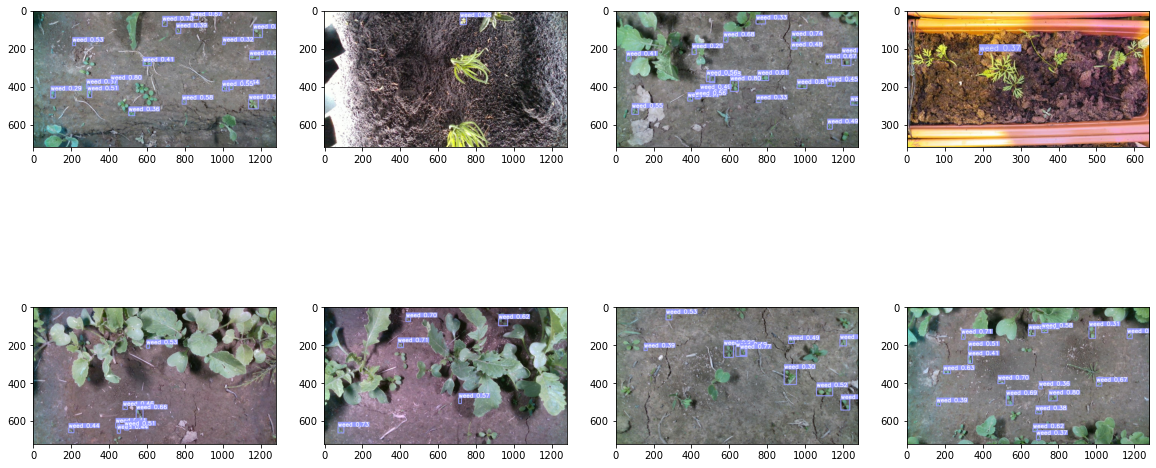

In [46]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = os.listdir('data/valid/images')

for idx in itertools.product(range(2),range(4)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'data/valid/images/{imgname}')
    results = model(img)
    ax[idx[0],idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))